In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
columns_used = ['borough', 'city', 'complaint_type', 'created_date', 'incident_address', 'incident_zip', 'latitude', 'location_type', 'longitude','street_name', 'unique_key'] 
df_311= pd.read_csv('C:/Users/GARIMA/Downloads/fhrw-4uyv.csv', parse_dates = ['created_date'], usecols = columns_used)
df_311.head()

,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,city,borough,latitude,longitude,location_type
0,2019-11-22 20:45:28,44996352,HEAT/HOT WATER,10030.0,114 WEST 134 STREET,WEST 134 STREET,NEW YORK,MANHATTAN,40.813749,-73.942115,RESIDENTIAL BUILDING
1,2019-11-22 12:02:07,44995138,UNSANITARY CONDITION,11235.0,8 BRIGHTON 15 STREET,BRIGHTON 15 STREET,BROOKLYN,BROOKLYN,40.577946,-73.954901,RESIDENTIAL BUILDING
2,2019-11-22 12:47:37,44994949,HEAT/HOT WATER,10452.0,1355 GRAND CONCOURSE,GRAND CONCOURSE,BRONX,BRONX,40.837688,-73.914632,RESIDENTIAL BUILDING
3,2019-11-22 19:46:28,44994043,HEAT/HOT WATER,11213.0,712 CROWN STREET,CROWN STREET,BROOKLYN,BROOKLYN,40.665347,-73.933809,RESIDENTIAL BUILDING
4,2019-11-22 13:00:52,44995755,HEAT/HOT WATER,10037.0,2300 5 AVENUE,5 AVENUE,NEW YORK,MANHATTAN,40.815510,-73.935632,RESIDENTIAL BUILDING


In [3]:

df_311.dtypes


created_date        datetime64[ns]
unique_key                   int64
complaint_type              object
incident_zip               float64
incident_address            object
street_name                 object
city                        object
borough                     object
latitude                   float64
longitude                  float64
location_type               object
dtype: object

In [4]:

missing_data_311= df_311.isnull()
missing_data_311.head()

,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,city,borough,latitude,longitude,location_type
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False


In [5]:
for column in missing_data_311.columns.values.tolist():
    print(column)
    #Menghitung jumlah masing-masing nilai unik pada kolom data
    print (missing_data_311[column].value_counts())
    print("")

created_date
False    5930638
Name: created_date, dtype: int64

unique_key
False    5930638
Name: unique_key, dtype: int64

complaint_type
False    5930638
Name: complaint_type, dtype: int64

incident_zip
False    5849992
True       80646
Name: incident_zip, dtype: int64

incident_address
False    5877807
True       52831
Name: incident_address, dtype: int64

street_name
False    5877807
True       52831
Name: street_name, dtype: int64

city
False    5850408
True       80230
Name: city, dtype: int64

borough
False    5930638
Name: borough, dtype: int64

latitude
False    5850018
True       80620
Name: latitude, dtype: int64

longitude
False    5850018
True       80620
Name: longitude, dtype: int64

location_type
False    5877808
True       52830
Name: location_type, dtype: int64



In [6]:
df_311['complaint_type'].value_counts()

HEAT/HOT WATER            1198163
HEATING                    887869
PLUMBING                   706978
GENERAL CONSTRUCTION       500863
UNSANITARY CONDITION       445186
PAINT - PLASTER            361257
PAINT/PLASTER              343883
ELECTRIC                   305436
NONCONST                   260890
DOOR/WINDOW                202733
WATER LEAK                 190903
GENERAL                    149074
FLOORING/STAIRS            136444
APPLIANCE                  111383
HPD Literature Request      52830
SAFETY                      50847
OUTSIDE BUILDING             7088
ELEVATOR                     6591
Unsanitary Condition         5499
CONSTRUCTION                 5078
General                      1163
Safety                        424
STRUCTURAL                     16
Plumbing                       11
AGENCY                          9
VACANT APARTMENT                8
Outside Building                6
Appliance                       4
Electric                        1
Mold          

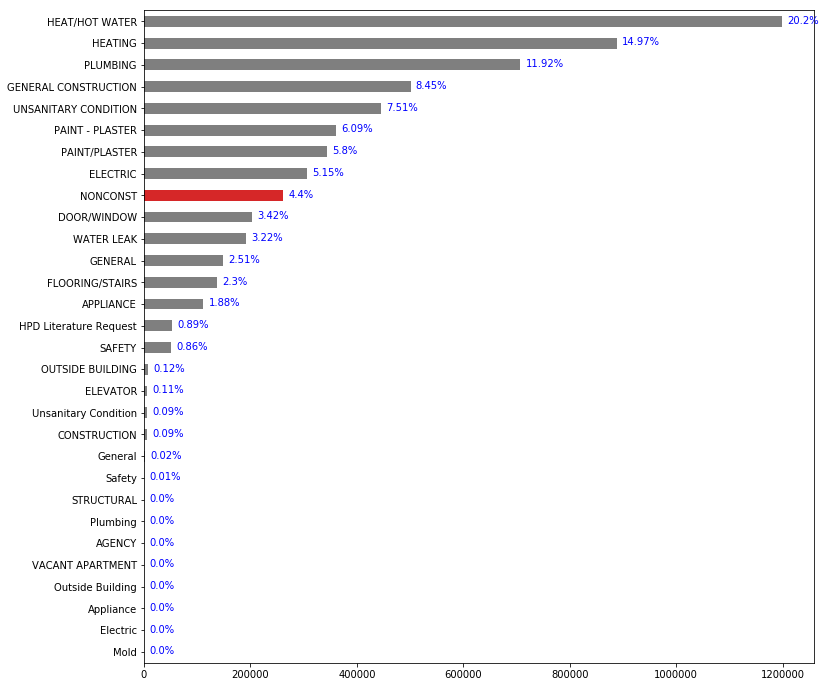

In [7]:
# Set colors
colors = ['C7', 'C7', 'C7', 'C7', 'C7', 'C7', 'C7', 'C7', 'C7', 'C7', 'C7', 'C7', 'C7', 'C7', 'C7', 'C7', 'C7', 'C7', 'C7', 'C7', 'C7', 'C3']
#Set the series
df_311_complaint_type = df_311['complaint_type'].value_counts()
df_311_complaint_type.sort_values(ascending = True, inplace =True)
Total_complaint = df_311_complaint_type.sum()

# Create the barh plot
df_311_complaint_type.plot(kind = 'barh', figsize = (12,12), color = colors)

# Set text label to show the percentage of each complaint
for index, value in enumerate(df_311_complaint_type):
    label =  '{}%'.format(round((value/Total_complaint)*100, 2)) 
    plt.annotate(label, xy=(value + 10000, index-0.1), color='blue')
    
plt.show()